---
title: "Supervised Learning"
format:
    html: 
        code-fold: false
---

## Introduction and Motivation

In this supervised analysis, we aim to evaluate features that contribute the most to song popularity. This is going to be done through different types of machine learning models. By selecting the most relevant features, we can improve model accuracy. 


## Overview of Methods

To predict song popularity, the following regression models were implemented:
- Linear Regression
- Random Forest Method
- Gradient Boosting Regression 

# Code 

Provide the source code used for this section of the project here.

If you're using a package for code organization, you can import it at this point. However, make sure that the **actual workflow steps**—including data processing, analysis, and other key tasks—are conducted and clearly demonstrated on this page. The goal is to show the technical flow of your project, highlighting how the code is executed to achieve your results.

If relevant, link to additional documentation or external references that explain any complex components. This section should give readers a clear view of how the project is implemented from a technical perspective.

Remember, this page is a technical narrative, NOT just a notebook with a collection of code cells, include in-line Prose, to describe what is going on.

In [16]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.multioutput import MultiOutputRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression

In [17]:
#Reads in all the processed-data
masterlist_data = pd.read_csv('../../data/processed-data/artist_song_masterlist.csv')
tfidf_df = pd.read_csv('../../data/processed-data/tfidf.csv')

In [18]:
#Expand the sentiment vader column so that we can split it into positive, negative, and neutral
masterlist_data['Sentiment (VADER)'] = masterlist_data['Sentiment (VADER)'].fillna('{}').apply(eval)
sentiment_df = masterlist_data['Sentiment (VADER)'].apply(pd.Series)
sentiment_df.columns = ['Sentiment_Neg', 'Sentiment_Neu', 'Sentiment_Pos', 'Sentiment_Compound']
masterlist_data = pd.concat([masterlist_data, sentiment_df], axis=1)
masterlist_data = masterlist_data.drop(columns=['Sentiment (VADER)'])


In [19]:
#Check columns
masterlist_data.columns.tolist()

['Track ID',
 'Track Name',
 'Song Popularity',
 'Album',
 'Song Release Date',
 'Duration (ms)',
 'Artists',
 'Explicit',
 'Song Rank',
 'Artist ID',
 'Genres',
 'Followers',
 'Popularity',
 'Lyrics',
 'Total Artists On Song',
 'Lyrics Word Count',
 'Genre_',
 'Genre_afro r&b',
 'Genre_afrobeats',
 'Genre_afrofuturism',
 'Genre_afropop',
 'Genre_alabama indie',
 'Genre_album rock',
 'Genre_alt z',
 'Genre_alte',
 'Genre_alternative hip hop',
 'Genre_alternative r&b',
 'Genre_alternative rock',
 'Genre_amapiano',
 'Genre_ambient folk',
 'Genre_anime',
 'Genre_art pop',
 'Genre_asheville indie',
 'Genre_atl hip hop',
 'Genre_azonto',
 'Genre_bedroom pop',
 'Genre_blues rock',
 'Genre_british folk',
 'Genre_bubblegrunge',
 'Genre_bubblegum bass',
 'Genre_canadian hip hop',
 'Genre_canadian pop',
 'Genre_candy pop',
 'Genre_chamber pop',
 'Genre_classic oklahoma country',
 'Genre_classic rock',
 'Genre_classic texas country',
 'Genre_colombian pop',
 'Genre_conscious hip hop',
 'Genre_con

In [20]:
#Look at all the types of the columns
pd.set_option('display.max_rows', None)
print(masterlist_data.dtypes)
pd.reset_option('display.max_rows')

Track ID                           object
Track Name                         object
Song Popularity                   float64
Album                              object
Song Release Date                  object
Duration (ms)                     float64
Artists                            object
Explicit                             bool
Song Rank                           int64
Artist ID                          object
Genres                             object
Followers                           int64
Popularity                          int64
Lyrics                             object
Total Artists On Song             float64
Lyrics Word Count                   int64
Genre_                              int64
Genre_afro r&b                      int64
Genre_afrobeats                     int64
Genre_afrofuturism                  int64
Genre_afropop                       int64
Genre_alabama indie                 int64
Genre_album rock                    int64
Genre_alt z                       

In [21]:
#Select numeric features 
selected_features = [
    'Duration (ms)', 'Explicit', 'Song Rank', 'Followers', 'Lyrics Word Count', 
    'Total Artists On Song', 'Sentiment_Neg', 'Sentiment_Neu', 
    'Sentiment_Pos', 'Sentiment_Compound'
]

#Select all the genre columns 
genre_columns = [col for col in masterlist_data.columns if col.startswith('Genre_')]
selected_features.extend(genre_columns)

X = masterlist_data[selected_features]
y = masterlist_data['Song Popularity']

In [22]:
#80/20 split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [23]:
#RMF model is used to predict song popularity based on given features
rf_model = RandomForestRegressor(random_state=42)

rf_model.fit(X_train, y_train)

y_rf_pred = rf_model.predict(X_test)

mse_rf = mean_squared_error(y_test, y_rf_pred)
r2_rf = r2_score(y_test, y_rf_pred)

print(f"Random Forest Mean Squared Error: {mse_rf}")
print(f"Random Forest R-Squared: {r2_rf}")

Random Forest Mean Squared Error: 270.206915
Random Forest R-Squared: 0.5391634290684586


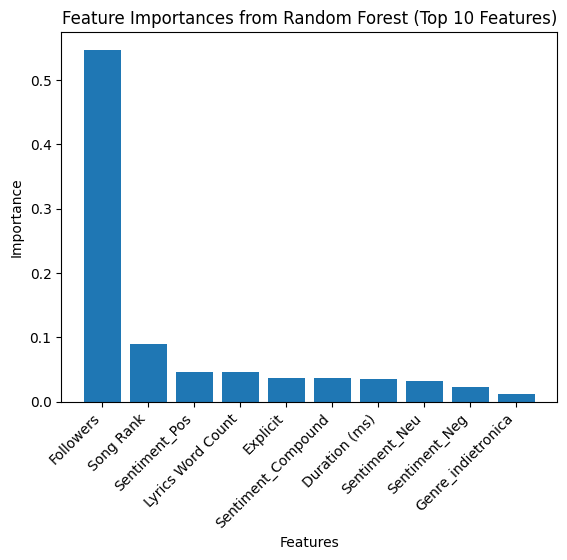

In [24]:
#Top 10 important features were uncovered 
n = 10
importances = rf_model.feature_importances_
indices = np.argsort(importances)[::-1]

top_features = indices[:n]
other_importance = np.sum(importances[indices[n:]])

plt.bar(
    range(n),
    importances[top_features],
    tick_label=[selected_features[i] for i in top_features]
)
 
plt.xticks(rotation=45, ha="right")
plt.title("Feature Importances from Random Forest (Top 10 Features)")
plt.ylabel("Importance")
plt.xlabel("Features")
plt.show()


## Interpretation

It seems like 'Followers' is the most important aspect to sconsider for song popularity. This means, even if the song is really good, the artists should promote themselves.

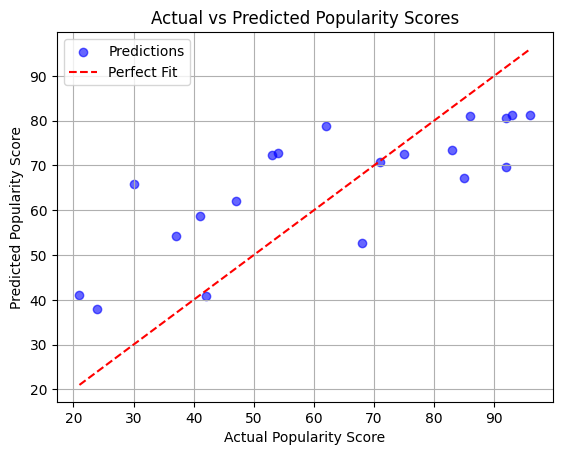

In [25]:
#Figure shows the actual vs predict popularity scores 
plt.scatter(y_test, y_rf_pred, alpha=0.6, color='blue', label='Predictions')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', label='Perfect Fit')  # Line of perfect predictions
plt.title("Actual vs Predicted Popularity Scores")
plt.xlabel("Actual Popularity Score")
plt.ylabel("Predicted Popularity Score")
plt.legend()
plt.grid(True)
plt.show()


In [26]:
X.dropna(inplace=True)
#There are two targets 
y_multi = masterlist_data[['Song Popularity', 'Song Rank']]
y_multi = y_multi.loc[X.index]

#Split in 80/20
X_train, X_test, y_train, y_test = train_test_split(X, y_multi, test_size=0.2, random_state=42)

#Using GradientBoostingRegressor
multi_regressor = MultiOutputRegressor(GradientBoostingRegressor(random_state=42))
multi_regressor.fit(X_train, y_train)

y_multi_pred = multi_regressor.predict(X_test)

mse_popularity = mean_squared_error(y_test['Song Popularity'], y_multi_pred[:, 0])
mse_rank = mean_squared_error(y_test['Song Rank'], y_multi_pred[:, 1])

print(f"Popularity MSE: {mse_popularity}")
print(f"Rank MSE: {mse_rank}")

/var/folders/c4/ckrgfkld6ll_8d5glczkzftw0000gn/T/ipykernel_16209/4181636287.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.dropna(inplace=True)


Popularity MSE: 210.31359827795765
Rank MSE: 1.038648227890669


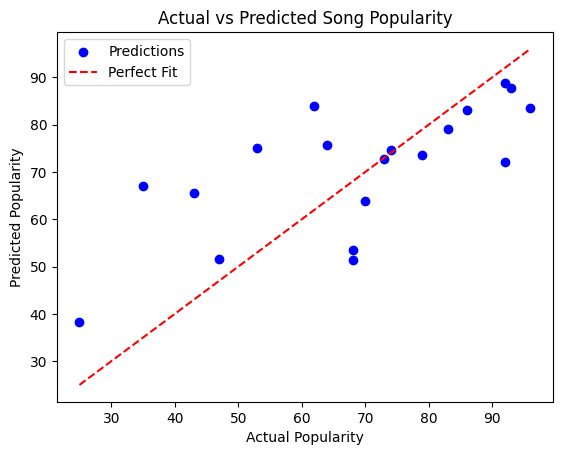

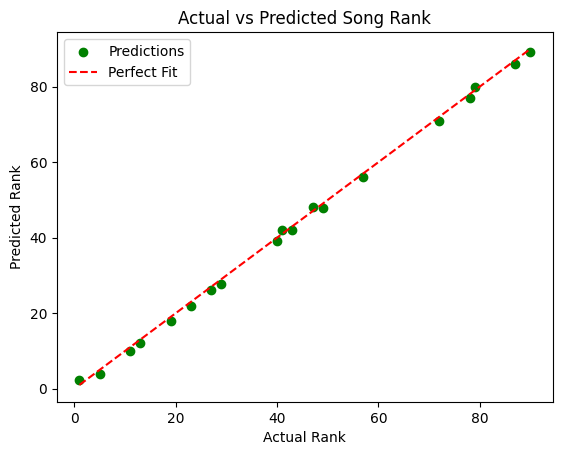

In [27]:
#Splitting the output by song popularity and song rank so we can individually graph them 
actual_popularity = y_test['Song Popularity']
predicted_popularity = y_multi_pred[:, 0]
actual_rank = y_test['Song Rank']
predicted_rank = y_multi_pred[:, 1]

#This is for song popularity
plt.scatter(actual_popularity, predicted_popularity, color='blue', label='Predictions')
plt.plot([actual_popularity.min(), actual_popularity.max()], 
         [actual_popularity.min(), actual_popularity.max()], 
         color='red', linestyle='--', label='Perfect Fit')
plt.title('Actual vs Predicted Song Popularity')
plt.xlabel('Actual Popularity')
plt.ylabel('Predicted Popularity')
plt.legend()
plt.show()

#This is for song rank 
plt.scatter(actual_rank, predicted_rank, color='green', label='Predictions')
plt.plot([actual_rank.min(), actual_rank.max()], 
         [actual_rank.min(), actual_rank.max()], 
         color='red', linestyle='--', label='Perfect Fit')
plt.title('Actual vs Predicted Song Rank')
plt.xlabel('Actual Rank')
plt.ylabel('Predicted Rank')
plt.legend()

plt.show()

## Interpretation

There seems to be an overfitting with song rank, but the MSE score shows that there is a good predictors in song rank while a low prediction in song popularity. 

In [ ]:
#Analysing song popularity based on sentiment outputs 
X = masterlist_data[['Sentiment_Pos', 'Sentiment_Neg', 'Sentiment_Neu', 'Explicit']]
y = masterlist_data['Song Popularity']

#Using test train split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Using Random Forest to train and test data 
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-Squared (R2): {r2}")

Mean Squared Error (MSE): 574.7747460666667
R-Squared (R2): 0.019724483974030815


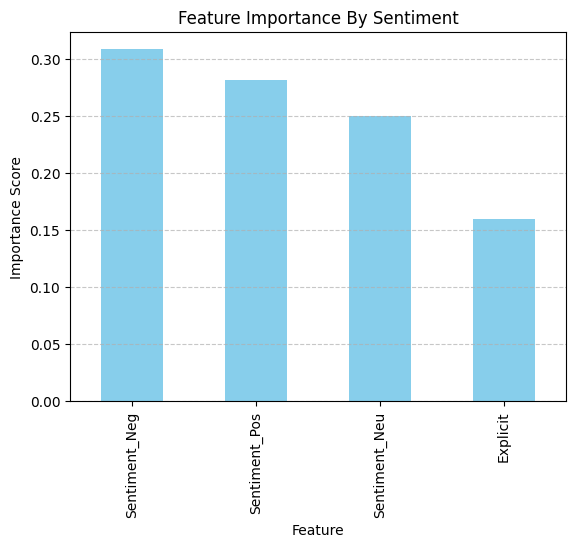

In [ ]:
#Graphing the sentiment values with feature importance to see if positive, negative or neutral is better along with being explicit
feature_importances = pd.Series(rf_model.feature_importances_, index=X.columns)

feature_importances.sort_values(ascending=False).plot(kind='bar', color='skyblue')
plt.title('Feature Importance By Sentiment')
plt.ylabel('Importance Score')
plt.xlabel('Feature')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

## Interpretation 

Sentiment_Neg has the highest importance score. This shows that songs that have negative sentiment tend to have higher song popularity. A song being explicit or not does not seem to matter as much, which is surprising because we wonder if that could be due to song being played in public. 
